In [45]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

___
## Задание 1.
Выберите один или несколько ответов:
> Конечных узлов (листьев) 2

> Критерий gini в исходной выборке равен 0.32

> Обученное дерево решений получилось с ошибками

> Глубина дерева равна 2

In [46]:
dataset = pd.DataFrame(
    [[1, 0, 0], [0, 0, 1], [0, 1, 1], [1, 1, 1], [0, 0, 1]], columns=['холодно', 'солнце_светит', 'идти_гулять'])
dataset

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [47]:
tree = DecisionTreeClassifier()
tree.fit(X, y)


DecisionTreeClassifier()

In [48]:
n_leaves = tree.tree_.n_leaves
print("Количество конечных узлов (листьев):", n_leaves)

Количество конечных узлов (листьев): 3


In [49]:
classes = Counter(y)
whole = len(y)

gini = 1

for freq in classes.values():
    gini -= (freq/whole)**2

print("", gini)


 0.31999999999999984


In [50]:
predictions = tree.predict(X)
errors = sum(predictions != y)
print("Количество ошибок:", errors)

Количество ошибок: 0


In [51]:
depth = tree.tree_.max_depth
print("Глубина дерева:", depth)

Глубина дерева: 2


---
## Задание 2.
Обучите дерево решений из sklearn на базовых параметрах для решения поставленной задачи и у неё посмотрите на важность признаков и выберите правильные варианты ответа в LMS:

Выберите один ответ:
> Важность 'холодно' 0.375, важность 'солнце светит' 0.625

> Важность 'холодно' 0.5, важность 'солнце светит' 0.5

> Нет правильного ответа

> Важность 'холодно' 2, важность 'солнце светит' 1

In [52]:
names = tree.feature_names_in_
importances = tree.feature_importances_
pd.DataFrame([importances], columns=names.tolist())

,холодно,солнце_светит
0,0.375,0.625


---
## Задание 3.
Будем работать с датасетом музыкальных композиций, только с меньшей версией этого набора данных. Целевой признак popularity.

Ссылка на нужную версию датасета.

1. Считайте данные через pandas 

2. Сделайте разбиение на обучение и тест с соотношением 80/20 и random_state=1. 

3. Проверьте есть ли в датасете категориальные строковые признаки. Если есть, то преобразуйте через OrdinalEncoder. 

Какая получилась размерность у тренировочной и тестовой выборок?

Запишите ответ в виде: кол-во строк, кол-во столбцов через запятую, с пробелом. 
Пример ввода: 7500, 20 

У тренировочной Ответ, у тестовой  Ответ

In [53]:
music = pd.read_csv("./musical_composes.csv")

music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5000 non-null   int64  
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   bool   
 3   danceability      5000 non-null   float64
 4   energy            5000 non-null   float64
 5   key               5000 non-null   int64  
 6   loudness          5000 non-null   float64
 7   mode              5000 non-null   int64  
 8   speechiness       5000 non-null   float64
 9   acousticness      5000 non-null   float64
 10  instrumentalness  5000 non-null   float64
 11  liveness          5000 non-null   float64
 12  valence           5000 non-null   float64
 13  tempo             5000 non-null   float64
 14  time_signature    5000 non-null   int64  
 15  track_genre       5000 non-null   object 
dtypes: bool(1), float64(9), int64(5), object(1

In [54]:
music["explicit"] = music["explicit"].apply(lambda x: 1 if x == True else 0)

In [55]:
ord_enc = OrdinalEncoder()
music["track_genre"] = ord_enc.fit_transform(music[["track_genre"]])

In [56]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5000 non-null   int64  
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   int64  
 3   danceability      5000 non-null   float64
 4   energy            5000 non-null   float64
 5   key               5000 non-null   int64  
 6   loudness          5000 non-null   float64
 7   mode              5000 non-null   int64  
 8   speechiness       5000 non-null   float64
 9   acousticness      5000 non-null   float64
 10  instrumentalness  5000 non-null   float64
 11  liveness          5000 non-null   float64
 12  valence           5000 non-null   float64
 13  tempo             5000 non-null   float64
 14  time_signature    5000 non-null   int64  
 15  track_genre       5000 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 625

In [57]:
y = music["popularity"]
X = music.drop(columns=["popularity"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [58]:
print(f"У тренировочной {X_train.shape}, у тестовой {X_test.shape}")

У тренировочной (4000, 15), у тестовой (1000, 15)


---
## Задание 4.
Продолжайте работать с датасетом музыкальных композиций.

1. Обучите дерево решений для задачи на базовых параметрах с фиксированным random_state=1 

2. Посчитайте метрику MSE и выберите правильный вариант ответа:

Выберите один ответ:
> Модель переобучена на обучающем наборе данных, необходимо уменьшить глубину дерева

> Модель переобучена на тестовом наборе данных, необходимо уменьшить глубину дерева

> Модель недообучена, необходимо увеличить глубину дерева

> Модель недообучена, необходимо уменьшить глубину дерева

In [59]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

y_pred_test = tree.predict(X_test)
score_test = mean_squared_error(y_test, y_pred_test)

y_pred_train = tree.predict(X_train)
score_train = mean_squared_error(y_train, y_pred_train)

print(f"Скоры на трейне: {score_train}")
print(f"Скоры на тесте: {score_test}")

Скоры на трейне: 20.26219201619459
Скоры на тесте: 882.1089755234448


> Модель переобучена на обучающем наборе данных, необходимо уменьшить глубину дерева

---
## Задание 5.
Продолжайте работать с датасетом музыкальных композиций.

У модели дерево решений оставьте параметр random_state=1. Измените только глубину дерева решений в диапазонах от 1 до 25, чтобы метрика MSE на тесте стала самой лучшей и напишите полученное значение метрики, округлив её до 2 знака после точки.

In [60]:
score_list = []
tree_depth = [i for i in range(1, 26)]

for i in tree_depth:
    tree = DecisionTreeRegressor(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score_test = np.round(mean_squared_error(y_test, y_pred),2)
    score_list.append(score_test)
    
score_list[np.argmin(score_list)]

705.91

Ваш ответ неверен. Внимательно изучите материалы по теме

---
## Задание 6.
Продолжайте работать с датасетом музыкальных композиций.
Модель регрессии обучилась крайне плохо на датасете, давайте перейдем к задаче бинарной классификации (популярная песня/не популярная песня), для этого нужно перевести целевой признак `popularity` в бинарный вид: 

- Если признак `popularity` больше 50 - 1 класс

- Если признак `popularity` меньше или равен 50 - 0 класс 

Работайте с выборками после разбиения на обучение и тест и создайте переменные y_train_bin и y_test_bin.

Посчитайте соотношение классов на обучающей и тестовой выборках и укажите эти значения

Объектов 1 класса на тесте  ___Ответ___ и объектов 0 класса на тесте ___Ответ___

Объектов 1 класса на обучении ___Ответ___ и объектов 0 класса на обучении  ___Ответ___

In [21]:
music['popularity'] = music['popularity'].apply(lambda x: 1 if x > 50 else 0)

In [22]:
y = music["popularity"]
X = music.drop(columns=["popularity"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [23]:
y_train_1 = y_train.sum()
y_train_0 = len(y_train) - y_train_1

y_test_1 = y_test.sum()
y_test_0 = len(y_test) - y_test_1

print(
    f'Объектов 1 класса на тесте  {y_test_1} и объектов 0 класса на тесте {y_test_0}')

print(
    f'Объектов 1 класса на обучении  {y_train_1} и объектов 0 класса на обучении {y_train_0}')

Объектов 1 класса на тесте  401 и объектов 0 класса на тесте 599
Объектов 1 класса на обучении  1627 и объектов 0 класса на обучении 2373


---
## Задача 7.
Продолжайте работать с датасетом музыкальных композиций.
Обучите дерево решений для задачи бинарной классификации с фиксированным `random_state=1`, измените только глубину дерева в диапазоне от 1 до 25, чтобы метрика accuracy на тесте была самая лучшая.

Какая метрика accuracy на тесте у вас получилась?

In [24]:
score_list = []
tree_depth = [i for i in range(1, 26)]

for i in tree_depth:
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score_test = accuracy_score(y_test, y_pred)
    score_list.append(score_test)
    
score_list[np.argmax(score_list)]

0.698

Ваш ответ неверен. Внимательно изучите материалы по теме.


---
## Задание 8.
Продолжайте работать с датасетом музыкальных композиций.
Получите важности признаков у обученной модели дерева решений с предыдущего задания и выберите верные утверждения:

Выберите один или несколько ответов:

> Признак `duration_ms` полезней, чем признак `danceability`

> Признак `valence` один из самых полезных признаков

> Признак `key` полезней, чем признак `liveness`

>Признак `explicit` один из самых полезных признаков

<Axes: >

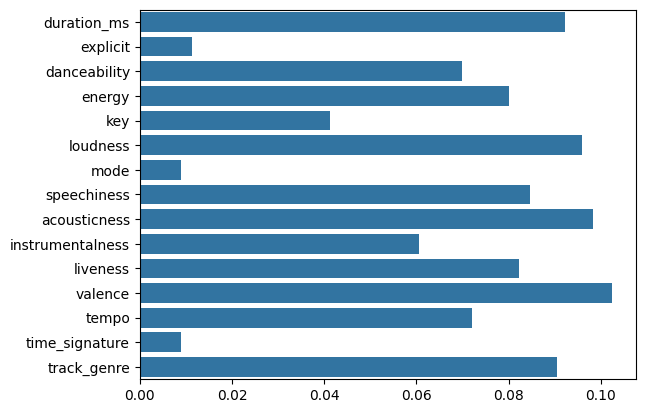

In [25]:
names = tree.feature_names_in_
importances = tree.feature_importances_
importances_bar = dict(zip(names, importances))
sns.barplot(importances_bar, orient='h')

Ответ
---
> Признак `duration_ms` полезней, чем признак `danceability`

> Признак `valence` один из самых полезных признаков
---